# clustering

## kmeans clustering

### import required package

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaboarn as sns

# load data set

In [8]:
df = pd.read_csv("./Mall_Customers.csv")
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
## remove the colums which are not needed
#df.drop(["CustomerID", "Gender", "Age"], axis = 1, inplace = True)
#print(df.columns)
print(df.columns)

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [16]:
df.rename({'Annual Income (k$)' : 'Income'}, inplace = True, axis = 1)
df.rename({'Spending Score (1-100)' : 'Score'}, inplace = True, axis = 1)

In [17]:
print(df.columns)

Index(['Income', 'Score'], dtype='object')


Text(0.5, 1.0, 'Income vs Expenditure')

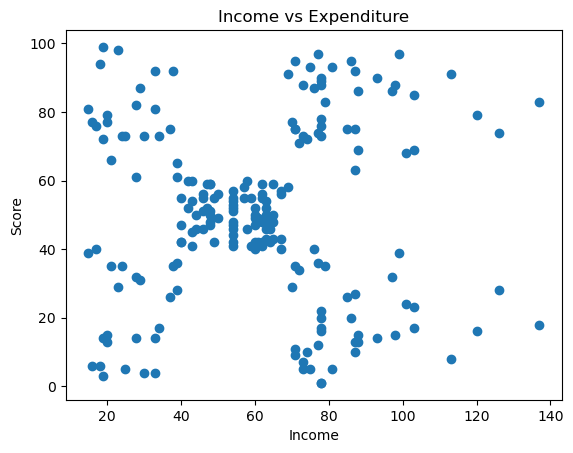

In [19]:
plt.scatter(df['Income'], df['Score'])
plt.xlabel('Income')
plt.ylabel('Score')
plt.title("Income vs Expenditure")

In [20]:
# import the kmeans class for creating the cluster
from sklearn.cluster import KMeans

In [25]:
# create an object of KMeans
kmeans_model = KMeans(n_clusters = 5, random_state = 12345) 
#fit data into the object
#- this will divide the data into 5 cluster
kmeans_model.fit(df)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=12345)

In [26]:
kmeans_model.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [28]:
# inspect the centroids
kmeans_model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

## result visualization

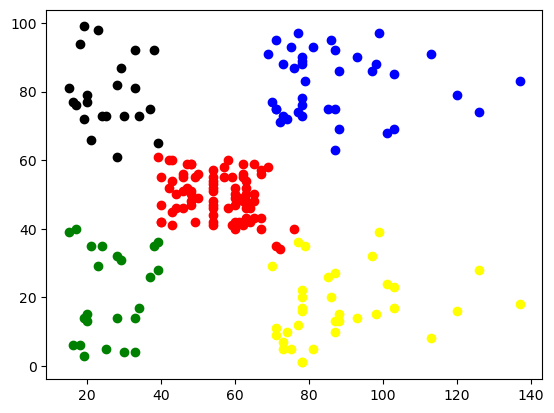

In [36]:
plt.scatter(df['Income'][kmeans_model.labels_ == 0],
            df['Score'][kmeans_model.labels_ == 0],
            color='blue', label = "Cluster 0")
plt.scatter(df['Income'][kmeans_model.labels_ == 1],
            df['Score'][kmeans_model.labels_ == 1],
            color='green', label = "Cluster 1")
plt.scatter(df['Income'][kmeans_model.labels_ == 2],
            df['Score'][kmeans_model.labels_ == 2],
            color='yellow', label = "Cluster 2")
plt.scatter(df['Income'][kmeans_model.labels_ == 3],
            df['Score'][kmeans_model.labels_ == 3],
            color='red', label = "Cluster 3")
plt.scatter(df['Income'][kmeans_model.labels_ == 4],
            df['Score'][kmeans_model.labels_ == 4],
            color='black', label = "Cluster 4")


Text(0.5, 1.0, 'Income vs Expenditure')

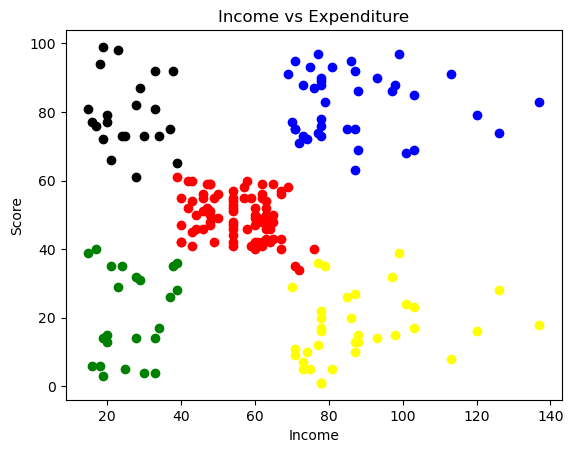

In [39]:
colors = ["blue", "green", "yellow", "red", "black"]
for cluster in range(len(kmeans_model.cluster_centers_)):
    plt.scatter(df['Income'][kmeans_model.labels_ == cluster],
            df['Score'][kmeans_model.labels_ == cluster],
            color=colors[cluster], label = cluster)
plt.xlabel('Income')
plt.ylabel('Score')
plt.title("Income vs Expenditure")